In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from mpl_toolkits import mplot3d

random_state = 42

# 1

In [57]:
df = pd.read_csv('/content/drive/MyDrive/Tracce/exam1.csv')
display(df)

,A0,A1,A2,y
0,2067.582042,-15.259519,0.020472,2
1,1319.589579,-18.412320,0.521308,0
2,1170.212183,-19.470602,0.814986,0
3,1424.162191,9.867841,0.848751,1
4,1551.069098,11.809364,0.884964,1
...,...,...,...,...
995,1451.791831,10.254577,0.123298,1
996,1277.830182,-16.022798,0.075187,0
997,1584.980652,-16.794614,0.518653,2
998,1587.214997,13.029405,0.609408,1


In [60]:
X = df.drop('y',axis=1)
y = df['y']

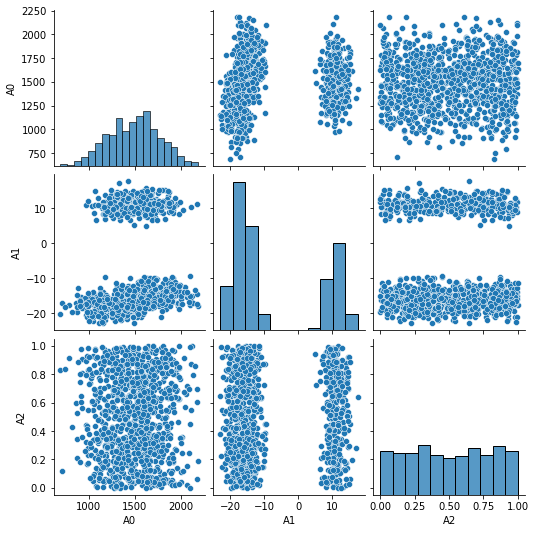

In [61]:
sns.pairplot(X)

I can observe that A0-A1, A1-A2 have a better separation of the data

# 2

In [63]:
from sklearn.model_selection import ParameterGrid

def clustering(data,k_range):
  inertias = []
  silhouette = []
  values = []
  for k in k_range:
    model = KMeans(n_clusters=k,random_state=random_state)
    pred_KMeans = model.fit_predict(X)
    inertias.append(model.inertia_)
    silhouette.append(silhouette_score(X,pred_KMeans))
    values.append([k,model.inertia_,silhouette_score(X,pred_KMeans)])
  return values,inertias,silhouette

values,inertias,silhouette = clustering(X,list(range(2,11)))

In [64]:
results = pd.DataFrame(data = values, columns=['n_cluster','inertia','silhouette'])
results.sort_values(by='silhouette', ascending=False).head(5)


,n_cluster,inertia,silhouette
0,2,2.519314e+07,0.568303
2,4,7.425540e+06,0.540522
1,3,1.307986e+07,0.533711
5,7,2.865042e+06,0.516643
3,5,5.276044e+06,0.513409


## 2.1

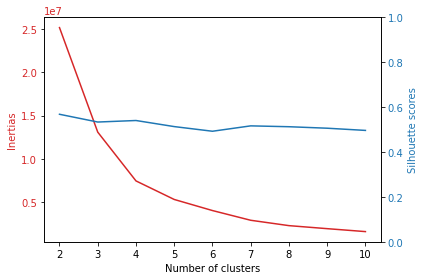

In [65]:
def two_plots(x, y1, y2, xlabel, y1label, y2label):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(y1label, color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(y2label, color=color)  # we already handled the x-label with ax1
    ax2.plot(x, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
#%%
two_plots(x=k_range, y1=inertias, y2=silhouette
          , xlabel='Number of clusters', y1label='Inertias', y2label='Silhouette scores'
         )

I can observe that the highest values of the Silhouette is on 4 but there is a slight difference between 3 and 4 so I choose 3 

# 3

In [66]:
model_optimized = KMeans(n_clusters=3,random_state=random_state)
y_km = model_optimized.fit_predict(X)
print('silhouette score for the optimized model is',silhouette_score(X,y_km))

silhouette score for the optimized model is 0.5337106344943366


# 4

In [67]:
from sklearn.metrics import pair_confusion_matrix
pcm = pair_confusion_matrix(y_km,y)
pcm / pcm.sum()
print("The percentage of match between the two clustering schemes is {:6.2f}%"\
    .format((pcm / pcm.sum()).diagonal().sum()*100))

The percentage of match between the two clustering schemes is  63.70%


# 5

In [69]:
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

#X_new = pd.concat([X.iloc[:,:1],X.iloc[:,1:].applymap(sqrt)],axis=1)
mms = MinMaxScaler()
X_new = pd.DataFrame(mms.fit_transform(X), columns = X.columns)
X_new.head()

,A0,A1,A2
0,0.920959,0.187350,0.020071
1,0.420655,0.109367,0.521198
2,0.320742,0.083191,0.815046
3,0.490599,0.808861,0.848830
4,0.575483,0.856884,0.885065


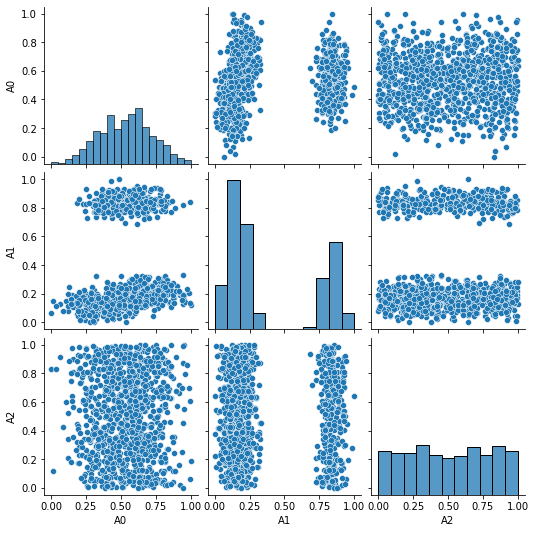

In [70]:
sns.pairplot(X_new)

In [71]:
#values_new,inertias_new,silhouette_new = clustering(X_new)
values,inertias,silhouette = clustering(X_new,list(range(2,11)))
results = pd.DataFrame(data = values, columns=['n_cluster','inertia','silhouette'])
results.sort_values(by='silhouette', ascending=False).head(5)


,n_cluster,inertia,silhouette
0,2,2.519314e+07,0.568303
2,4,7.425540e+06,0.540522
1,3,1.307986e+07,0.533711
5,7,2.865042e+06,0.516643
3,5,5.276044e+06,0.513409


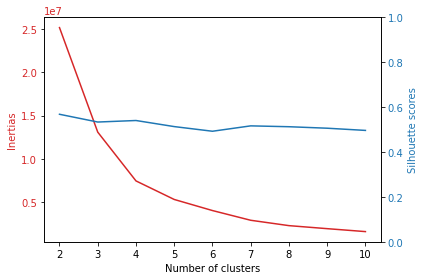

In [72]:
two_plots(x=k_range, y1=inertias, y2=silhouette
          , xlabel='Number of clusters', y1label='Inertias', y2label='Silhouette scores'
         )

In [73]:
model_optimized = KMeans(n_clusters=3,random_state=random_state)
y_km_new = model_optimized.fit_predict(X_new)
print('silhouette score for the optimized model is',silhouette_score(X_new,y_km))

silhouette score for the optimized model is 0.08294122087343822


In [75]:
from sklearn.metrics import pair_confusion_matrix
pcm = pair_confusion_matrix(y_km_new,y)
pcm / pcm.sum()
print("The percentage of match between the two clustering schemes is {:6.2f}%"\
    .format((pcm / pcm.sum()).diagonal().sum()*100))

The percentage of match between the two clustering schemes is  77.75%
